In [2]:
#import libraries
import pandas as pd
import numpy as np

dataset = pd.read_csv('master 2.csv', encoding='latin1')
#give out dataset head
dataset.head()

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# get sum for suicides and population, per country & year
dataset['Suicides_no_total'] = dataset['suicides_no'].groupby(dataset['country-year']).transform('sum')
dataset['population_total'] = dataset['population'].groupby(dataset['country-year']).transform('sum')

In [4]:
dataset.head()

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Suicides_no_total,population_total
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,73,2709600
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,73,2709600
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,73,2709600
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,73,2709600
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,73,2709600


In [5]:
dataset['suicide_rate_per_head'] = dataset['Suicides_no_total']/dataset['population_total']

In [6]:
dataset.head()

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Suicides_no_total,population_total,suicide_rate_per_head
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,73,2709600,0.000027
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,73,2709600,0.000027
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,73,2709600,0.000027
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,73,2709600,0.000027
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,73,2709600,0.000027


In [7]:
#drop outliers with 0 suicides
dataset.shape

(27820, 15)

In [8]:
#drop outliers with 0 suicides
new_df =dataset[dataset['Suicides_no_total'] !=0]
#comment: doesn't matter that much! 

In [9]:
#drop outliers with 0 suicides
new_df.shape

(27042, 15)

In [10]:
#drop outliers with 0 suicides
#new_df =dataset[dataset['Suicides_no_total'] !=0]

# delete unnecessary columns
del new_df['sex']
del new_df['age']
del new_df['suicides/100k pop']
del new_df['generation']
del new_df[' gdp_for_year ($) ']
del new_df['suicides_no']
del new_df['population']
del new_df['ï»¿country']
del new_df['country-year']
del new_df['Suicides_no_total']
del new_df['population_total']

#get 3 datasets:
GDP_data = new_df.copy()
HDI_data = new_df.copy()
both_data = new_df.copy()

#GDP:
#drop empty rows
GDP_data.dropna(subset = ["gdp_per_capita ($)"], inplace=True)
#only get rows with unique values
GDP_data = GDP_data.drop_duplicates()
del GDP_data['HDI for year']

#HDI: 
#drop empty rows
HDI_data.dropna(subset = ["HDI for year"], inplace=True)
#only get rows with unique values
HDI_data = HDI_data.drop_duplicates()
del HDI_data['gdp_per_capita ($)']

#both:
both_data.dropna(subset = ["HDI for year"], inplace=True)
both_data.dropna(subset = ["gdp_per_capita ($)"], inplace=True)
both_data = both_data.drop_duplicates()

#year
GDP_data_2014 = GDP_data.loc[GDP_data['year'] == 2014]
HDI_data_2014 = HDI_data.loc[HDI_data['year'] == 2014]
both_data_2014 = both_data.loc[both_data['year'] == 2014]

del GDP_data_2014['year']
del HDI_data_2014['year']
del both_data_2014['year']

In [11]:
GDP_data_2014.head()

,gdp_per_capita ($),suicide_rate_per_head
936,13400,0.000082
1224,4142,0.000021
1762,66809,0.000132
2134,54278,0.000161
2876,27503,0.000007


In [12]:
HDI_data_2014.head()
#HDI_data.head()

,HDI for year,suicide_rate_per_head
936,0.836,0.000082
1224,0.733,0.000021
1762,0.935,0.000132
2134,0.885,0.000161
2876,0.824,0.000007


In [13]:
both_data_2014.head()

,HDI for year,gdp_per_capita ($),suicide_rate_per_head
936,0.836,13400,0.000082
1224,0.733,4142,0.000021
1762,0.935,66809,0.000132
2134,0.885,54278,0.000161
2876,0.824,27503,0.000007


# Prepare Data for Simple Linear Regression

## Linearity

In [13]:
#@Pavlo: Did I check correctly with scatter plot that there is linearity?

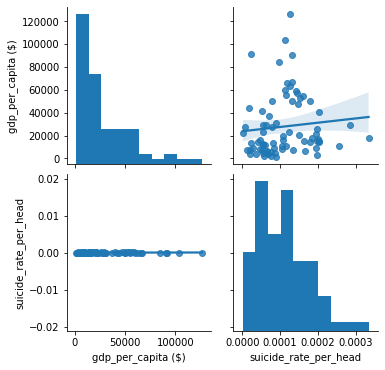

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Make a pair plot from the seaborn package
import seaborn as sea 
sea.pairplot(GDP_data_2014, kind = "reg")
plt.show()

Text(0.5, 0, 'gdp_per_capita ($)')

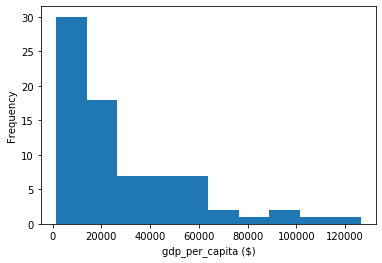

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Make a pair plot from the seaborn package
import seaborn as sea 

n, bins, patches = plt.hist(GDP_data_2014["gdp_per_capita ($)"])
plt.ylabel('Frequency')
plt.xlabel('gdp_per_capita ($)')

Text(0.5, 0, 'suicide_rate_per_head')

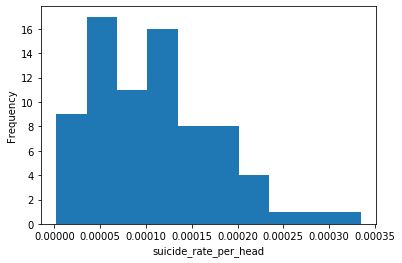

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Make a pair plot from the seaborn package
import seaborn as sea 


n, bins, patches = plt.hist(GDP_data_2014["suicide_rate_per_head"])
plt.ylabel('Frequency')
plt.xlabel('suicide_rate_per_head')

Text(0.5, 0, 'HDI for year')

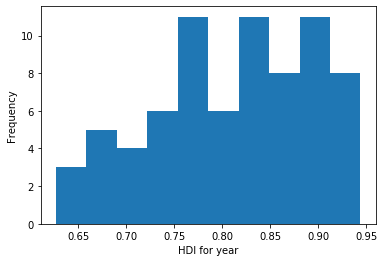

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Make a pair plot from the seaborn package
import seaborn as sea 


n, bins, patches = plt.hist(HDI_data_2014["HDI for year"])
plt.ylabel('Frequency')
plt.xlabel('HDI for year')


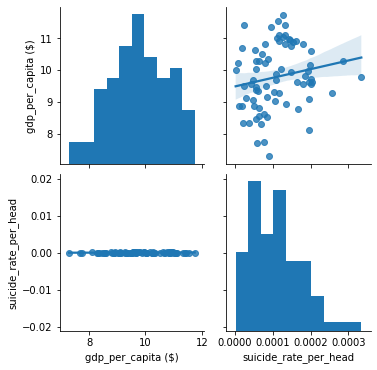

Text(0.5, 0, 'gdp_per_capita ($)')

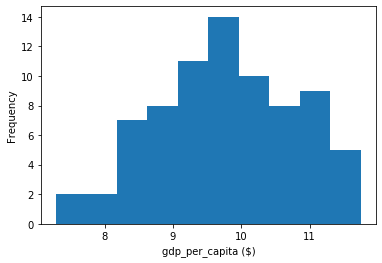

In [35]:
# data is skewed, so log transformation
#Transform both varaibles to log
GDP_data_2014_log = pd.DataFrame()

#We perform a log(x+1) tranformation since values of 0 would give inf
GDP_data_2014_log[["gdp_per_capita ($)"]] = np.log(GDP_data_2014[["gdp_per_capita ($)"]]+1)
GDP_data_2014_log[["suicide_rate_per_head"]] = np.log(GDP_data_2014[["suicide_rate_per_head"]]+1)

#Build the seaborn plot again
sea.pairplot(GDP_data_2014_log, kind = "reg")
plt.show()

n, bins, patches = plt.hist(GDP_data_2014_log["gdp_per_capita ($)"])
plt.ylabel('Frequency')
plt.xlabel('gdp_per_capita ($)')

### HDI

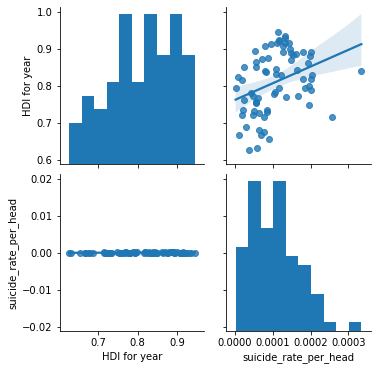

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Make a pair plot from the seaborn package
import seaborn as sea 
sea.pairplot(HDI_data_2014, kind = "reg")
plt.show()

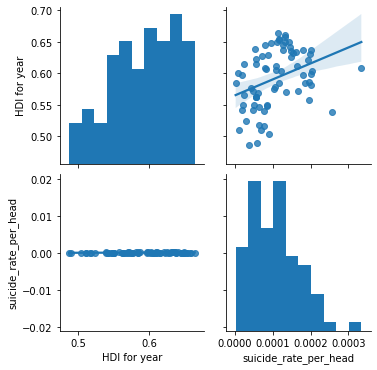

Text(0.5, 0, 'HDI for year')

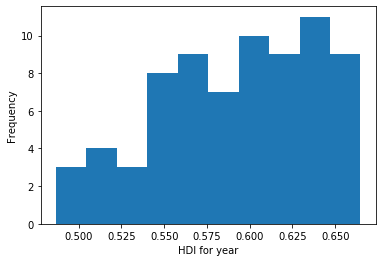

In [36]:
# data is skewed, so log transformation
#Transform both varaibles to log
HDI_data_2014_log = pd.DataFrame()

#@Pavlos: how many log transformations can I do?
#We perform a log(x+1) tranformation since values of 0 would give inf
HDI_data_2014_log[["HDI for year"]] = np.log(HDI_data_2014[["HDI for year"]]+1)
HDI_data_2014_log[["suicide_rate_per_head"]] = np.log(HDI_data_2014[["suicide_rate_per_head"]]+1)

#Build the seaborn plot again
sea.pairplot(HDI_data_2014_log, kind = "reg")
plt.show()

n, bins, patches = plt.hist(HDI_data_2014_log["HDI for year"])
plt.ylabel('Frequency')
plt.xlabel('HDI for year')

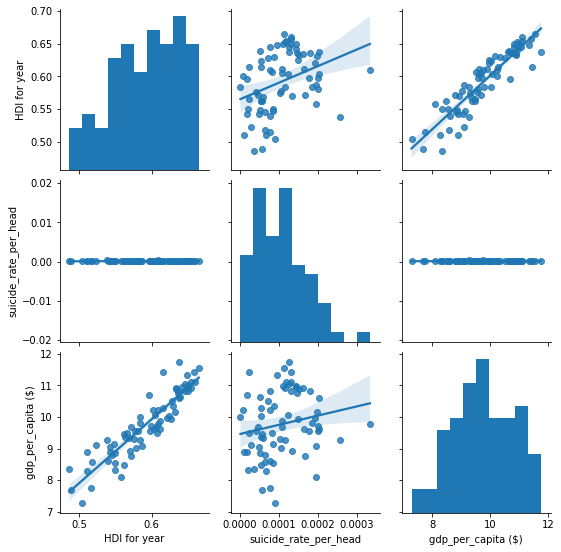

In [34]:
# for both:
# data is skewed, so log transformation
#Transform both varaibles to log
both_2014_log = pd.DataFrame()

#@Pavlos: how many log transformations can I do?
#We perform a log(x+1) tranformation since values of 0 would give inf
both_2014_log[["HDI for year"]] = np.log(both_data_2014[["HDI for year"]]+1)
both_2014_log[["suicide_rate_per_head"]] = np.log(both_data_2014[["suicide_rate_per_head"]]+1)
both_2014_log[["gdp_per_capita ($)"]] = np.log(both_data_2014[["gdp_per_capita ($)"]]+1)

#Build the seaborn plot again
sea.pairplot(both_2014_log, kind = "reg")
plt.show()

## Outliers

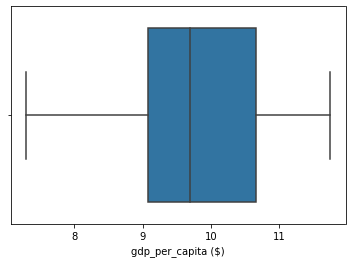

In [19]:
#@Pavlos: 
#get outliers
#sea.boxplot(df_2014_log)
#plt.show()
sea.boxplot(x=GDP_data_2014_log["gdp_per_capita ($)"])

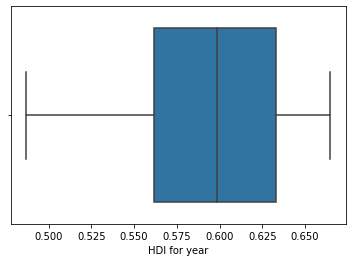

In [20]:
sea.boxplot(x=HDI_data_2014_log["HDI for year"])

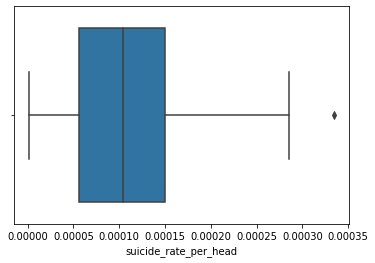

In [21]:
sea.boxplot(x=GDP_data_2014_log["suicide_rate_per_head"])

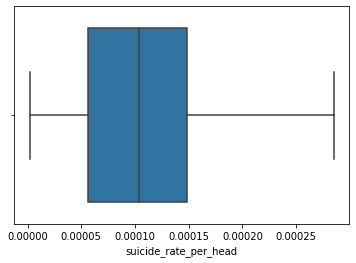

In [22]:
# show outliers:
outliers_2014 = GDP_data_2014_log.loc[GDP_data_2014_log['suicide_rate_per_head'] > 0.0003]
outliers_2014.head()
# @Pavlos: den würde ich dann rausnehmen
df_2014_log_w0outliers =GDP_data_2014_log[GDP_data_2014_log['suicide_rate_per_head'] < 0.0003]
df_2014_log_w0outliers.head()
sea.boxplot(x=df_2014_log_w0outliers["suicide_rate_per_head"])




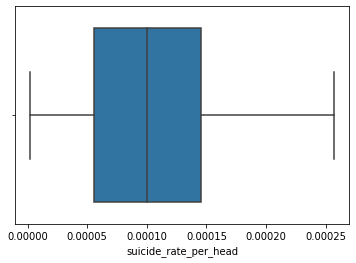

In [23]:
#also for hdi:
HDI_2014 =HDI_data_2014_log[HDI_data_2014_log['suicide_rate_per_head'] < 0.0003]
sea.boxplot(x=HDI_2014["suicide_rate_per_head"])

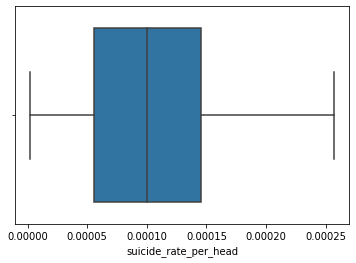

In [24]:
#also for both:
both_2014 =both_2014_log[both_2014_log['suicide_rate_per_head'] < 0.0003]
sea.boxplot(x=both_2014["suicide_rate_per_head"])

## Uncorrelation of Error Terms (Independence of Error Terms)

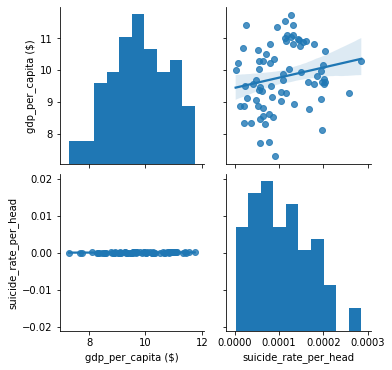

In [25]:
#Build the seaborn plot again
sea.pairplot(df_2014_log_w0outliers, kind = "reg")
plt.show()
#@Pavlos: I didn't use error terms? How do I get them :/ PredA didn't use them either I think



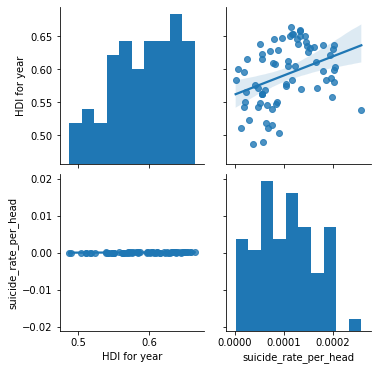

In [26]:
#HDI:
#Build the seaborn plot again
sea.pairplot(HDI_2014, kind = "reg")
plt.show()
#@Pavlos: I didn't use error terms? How do I get them :/ PredA didn't use them either I think



## Homoscedasticity

In [27]:
#@Pavlos: see plot above, no funnel shape, so we good, right?

# Simple Linear Regression

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

np.random.seed(40)

#Make a train and test split (70/30)
#train, test = train_test_split(social_media, test_size=0.30)
train_log, test_log = train_test_split(df_2014_log_w0outliers, test_size=0.30)

#Add the intercept
#train = sm.add_constant(train)
#test = sm.add_constant(test)

train_log = sm.add_constant(train_log)
test_log = sm.add_constant(test_log)

In [29]:
def fit_ols(data, xvars, yvars):
    
    ### BEGIN SOLUTION
    linreg = sm.OLS(data[yvars],data[xvars]).fit()
    ### END SOLUTION
    
    return linreg

In [30]:
linreg_log = fit_ols(data=train_log, xvars=["const","gdp_per_capita ($)"], yvars= "suicide_rate_per_head")

In [31]:
print(linreg_log.summary())

                              OLS Regression Results                             
Dep. Variable:     suicide_rate_per_head   R-squared:                       0.019
Model:                               OLS   Adj. R-squared:                 -0.001
Method:                    Least Squares   F-statistic:                    0.9694
Date:                   Tue, 03 Nov 2020   Prob (F-statistic):              0.330
Time:                           22:18:28   Log-Likelihood:                 429.31
No. Observations:                     52   AIC:                            -854.6
Df Residuals:                         50   BIC:                            -850.7
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

In [32]:
# Interpretation:
#only look at the suicide_rate_per_head
If t-statistic very lagre => a hypo likely to be true 
We can't reject null hypo if p-value > 0.05 , we can't say for sure that there is a relationship

#@Pavlo: for const -> can't reject null hypo
#for suicide?

#@Pavlo: Also say sth. to R2 and Adjusted R2, right?

SyntaxError: invalid syntax (<ipython-input-32-9ed3e7559db6>, line 3)

### HDI

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

np.random.seed(40)

#Make a train and test split (70/30)
#train, test = train_test_split(social_media, test_size=0.30)
HDI_train_log, HDI_test_log = train_test_split(HDI_2014, test_size=0.30)

#Add the intercept
#train = sm.add_constant(train)
#test = sm.add_constant(test)

HDI_train_log = sm.add_constant(HDI_train_log)
HDI_test_log = sm.add_constant(HDI_test_log)

In [34]:
def fit_ols(data, xvars, yvars):
    
    ### BEGIN SOLUTION
    linreg = sm.OLS(data[yvars],data[xvars]).fit()
    ### END SOLUTION
    
    return linreg

In [35]:
HDI_linreg_log = fit_ols(data=HDI_train_log, xvars=["const","HDI for year"], yvars= "suicide_rate_per_head")

In [36]:
print(HDI_linreg_log.summary())

                              OLS Regression Results                             
Dep. Variable:     suicide_rate_per_head   R-squared:                       0.183
Model:                               OLS   Adj. R-squared:                  0.166
Method:                    Least Squares   F-statistic:                     10.74
Date:                   Tue, 03 Nov 2020   Prob (F-statistic):            0.00195
Time:                           22:18:36   Log-Likelihood:                 422.44
No. Observations:                     50   AIC:                            -840.9
Df Residuals:                         48   BIC:                            -837.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0

In [ ]:
# Interpretation:
If t-statistic very lagre => a hypo likely to be true 
We reject null hypo if p-value < 0.05 -> we reject null hypo, statistically significant 

#@Pavlo: for both true -> reject null hypo

#@Pavlo: Also say sth. to R2 and Adjusted R2, right?
# for comparising with MLR 
# the higher the better
# you can talk about both of them, but not necessary

# Multiple Linear Regression

## Test Assumptions

In [37]:
# linear relationship between predictors and response 
#@Pavlos: predictors = GDP+HDI, response = s_rate, right? -> right
# if so, did that for SLR already

In [38]:
both_2014.head()

,HDI for year,suicide_rate_per_head,gdp_per_capita ($)
936,0.607589,0.000082,9.503085
1224,0.549854,0.000021,8.329175
1762,0.660107,0.000132,11.109608
2134,0.633928,0.000161,10.901893
2876,0.601032,0.000007,10.222087


In [39]:
# no multicollinearity
#In pandas, correlation can be calculated fairly easy
#By default the pearson correlation is calculated
both_2014.corr()

#GDP + HDI high collinearity! (which makes sense)

,HDI for year,suicide_rate_per_head,gdp_per_capita ($)
HDI for year,1.000000,0.374050,0.914108
suicide_rate_per_head,0.374050,1.000000,0.204246
gdp_per_capita ($),0.914108,0.204246,1.000000


In [40]:
# multivariate normality
#@Pavlos: Are QQ-Plots + Scatterplots from SLR enough?

In [41]:
# no autocorrelation
# done for SLR individually

In [42]:
# homoscedasticity
# done for SLR individually

## MLR Test

In [43]:
#Function that fits an OLS for advertising and theaters.
#This is done in exactly the same fashion as SLR
def make_mlr(data, xvars, yvars):
    
    ### BEGIN SOLUTION
    lm = sm.OLS(data[yvars], data[xvars]).fit()
    ### END SOLUTION
    
    return lm

In [44]:
#Add a constant
both_2014_const = sm.add_constant(both_2014)
#do MLR: 
lm_full = make_mlr(both_2014_const,["const","gdp_per_capita ($)","HDI for year"], "suicide_rate_per_head")
print(lm_full.summary())

                              OLS Regression Results                             
Dep. Variable:     suicide_rate_per_head   R-squared:                       0.255
Model:                               OLS   Adj. R-squared:                  0.234
Method:                    Least Squares   F-statistic:                     11.82
Date:                   Tue, 03 Nov 2020   Prob (F-statistic):           3.85e-05
Time:                           22:18:52   Log-Likelihood:                 609.01
No. Observations:                     72   AIC:                            -1212.
Df Residuals:                         69   BIC:                            -1205.
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

In [ ]:
# Interpretation:
F-statistic > 1 and p-value < 0.05 -> reject H0

-> model correctly specified, because adjusted R-squre optimal?


#Coefficients + p-value:
#@Pavlos: both significant, because P value smaller than 0.05?
gdp: increase in gdp 1$, decrease in suicides of -0.000000
    
hdi: increase in hdi 1-point, increase in suicides of 0.0015
    
# both r2 higher, -> better choice   
# both cases: p values are lower than 0.05
# reject null hypo

#@TODO: try it again with suicide_rate* 100 000

## Non-Collinearity (always after Regressions)

In [45]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_2014_log_w0outliers.values, i) for i in range(df_2014_log_w0outliers.shape[1])]
vif["features"] = df_2014_log_w0outliers.columns

#show:
vif.round(1)

#@Pavlos: so there is collinearity, because VIF is bigger than 1?

,VIF Factor,features
0,4.0,gdp_per_capita ($)
1,4.0,suicide_rate_per_head


### HDI

In [46]:
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(HDI_2014.values, i) for i in range(HDI_2014.shape[1])]
vif["features"] = HDI_2014.columns

#show:
vif.round(1)

#@Pavlos: so there is collinearity, because VIF is bigger than 1?

,VIF Factor,features
0,4.4,HDI for year
1,4.4,suicide_rate_per_head


## Check for normal distribution of error terms

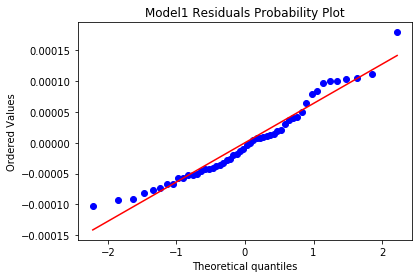

KstestResult(statistic=0.49995935545068193, pvalue=1.5222483528635914e-12)

In [47]:
#Make a QQ-plot of the residuals
from scipy import stats

stats.probplot(linreg_log.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")
plt.show()

#Do a K-S test
stats.kstest(linreg_log.resid, 'norm')

#@Pavlos: looks ok, right?

### HDI

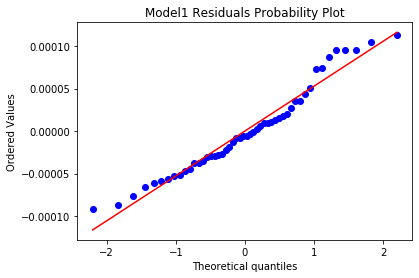

KstestResult(statistic=0.4999635862092466, pvalue=4.411165661796733e-12)

In [48]:
#Make a QQ-plot of the residuals
from scipy import stats

stats.probplot(HDI_linreg_log.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot")
plt.show()

#Do a K-S test
stats.kstest(HDI_linreg_log.resid, 'norm')

#@Pavlos: looks ok, right?